In [67]:
import numpy as np 
import matplotlib.pyplot as plt

In [68]:
data_count = 500
test_percent = 0.3
train_count = round(data_count * (1 - test_percent))
test_count = round(data_count * test_percent)
# random data from 1000 to 3000 (the area of the house in feet^2)
x_dataset = np.random.rand(train_count) * 2000 + 1000
x_test = np.random.rand(test_count) * 2000 + 1000   
# generate an array with data_count length with random values from 230 to 300
# these coficcients will be used to generate y_train 
coficcients = np.random.rand(data_count) * 70 + 230  
# generate y_train (the price of the house in $)
y_dataset = x_dataset * coficcients[0:train_count]
y_test = x_test * coficcients[train_count:data_count]
print(y_dataset[0:10])      

[731794.78166521 640613.24236767 665611.12568394 449151.1468677
 310179.65280705 777871.0706656  339238.09951905 275960.83166676
 707801.90338937 490210.45489926]


In [69]:
# normalize data
# subtract the mean and divide by the standard deviation
original_x = x_dataset
original_y = y_dataset
x_dataset = (x_dataset - np.mean(x_dataset)) / np.std(x_dataset)
y_dataset = (y_dataset - np.mean(y_dataset)) / np.std(y_dataset)
print(y_dataset[0:10])

[ 1.26446495  0.70054879  0.85514927 -0.4835568  -1.343032    1.54942575
 -1.16331879 -1.55465978  1.11607996 -0.22962374]


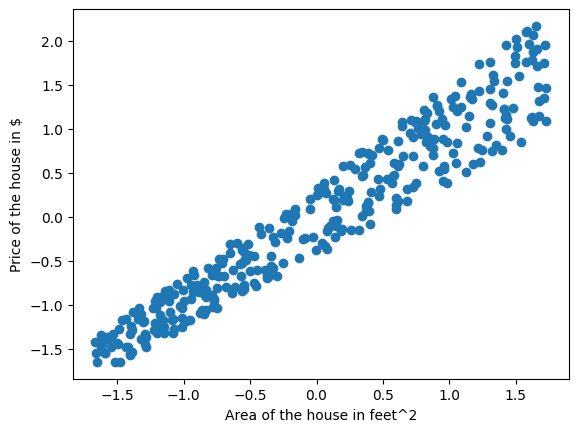

In [70]:
# plot the data
plt.scatter(x_dataset, y_dataset)
plt.xlabel('Area of the house in feet^2')
plt.ylabel('Price of the house in $')
plt.show()

In [71]:
def compute_cost(x,y,t0,t1):
    return np.sum((t0 + t1*x - y)**2) / (2*len(x))

In [72]:
# give an initial value to theta0 and theta1
theta0 = np.random.rand() 
theta1 = np.random.rand() 
print(theta0, theta1)

0.721795885814387 0.11124217257947833


In [73]:
def gradient(t0, t1, x, y, alpha=0.25, iterations=1000, plot=False):
    costs = []
    while (compute_cost(x,y,t0,t1) > 0.01 and iterations > 0):
        t0 = t0 - alpha * np.sum(t0 + t1*x - y) / len(x)
        t1 = t1 - alpha * np.sum((t0 + t1*x - y)*x) / len(x)
        costs.append(compute_cost(x,y,t0,t1))
        iterations -= 1

    if plot:
        iters = np.arange(0, len(costs))
        plt.plot(iters, costs)
        plt.xlabel("Iterations")
        plt.ylabel("Cost")
        plt.show()           


    return t0, t1

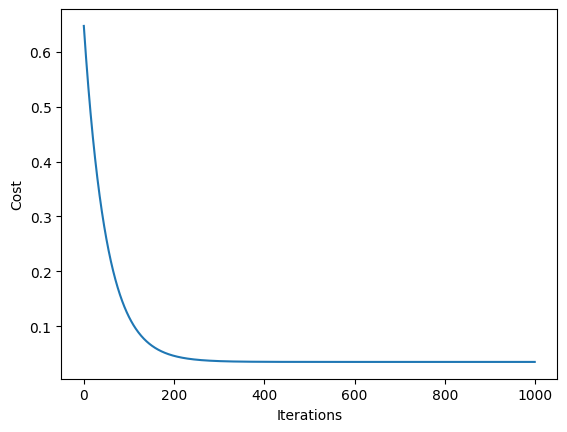

3.116082876596527e-05 0.9641172169129614


In [74]:
theta0, theta1 = gradient(theta0, theta1, x_dataset, y_dataset, 0.01, 1000, True)
print(theta0, theta1)

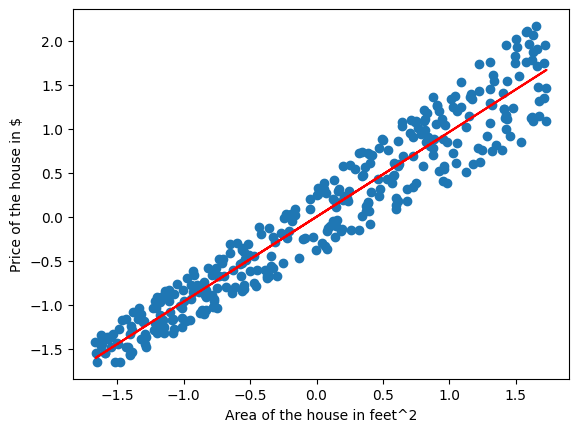

[ 0.87550083  0.40191356  1.48240653 -0.67573231 -1.56554199  1.2868646
 -1.04513933 -1.53830644  0.91115769 -0.02794752]


In [75]:

y_trained = theta0 + theta1*x_dataset
plt.scatter(x_dataset, y_dataset)
plt.plot(x_dataset, y_trained, c='r')
plt.xlabel("Area of the house in feet^2")
plt.ylabel("Price of the house in $")
plt.show()
print(y_trained[0:10])

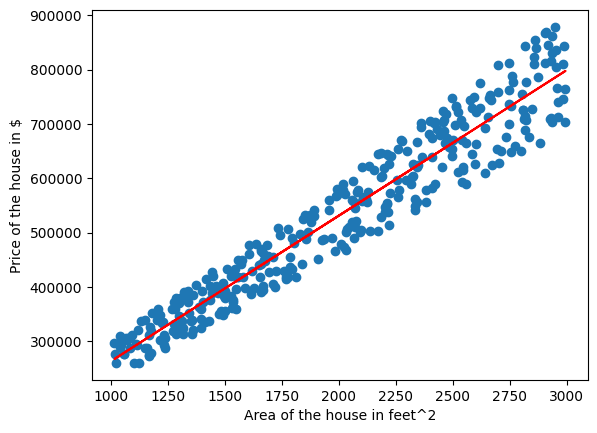

In [76]:
# get the original data
original_y_trained= y_trained * np.std(original_y) + np.mean(original_y)
# plot the original data
plt.scatter(original_x, original_y)
plt.plot(original_x, original_y_trained, c='r')
plt.xlabel("Area of the house in feet^2")
plt.ylabel("Price of the house in $")
plt.show()


In [78]:
# check the accuracy of the model
# this broken fix it
def r2_score(y, y_pred):
    return 1 - np.sum((y - y_pred)**2) / np.sum((y - np.mean(y))**2)

y_test_train = theta0 + theta1*x_test
print(y_test_train[0:10])
print(y_test[0:10])
score = r2_score(y_test, y_test_train)
if(score > 0.9):
    print("The model is accurate with a score of", round(score, 5))
else:
    print("The model is not accurate with a score of", round(score, 5))

[2189.27596456 2820.87356114 1978.08930188 1324.58200208 2337.52159312
 2564.61489335 2596.45403433 1191.47598533 1513.79209498 2721.9097069 ]
[584418.06800068 724404.58749648 488014.57991897 326754.54327394
 617062.6596063  772486.56207882 765949.71097655 359606.57775453
 398835.05650669 733295.66488611]
The model is not accurate with a score of -12.57251
